In [1]:
from sklearn import datasets
import pandas as pd
from scipy.stats import distributions
from scipy.stats import chi2, f, t, norm
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns



In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = ['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width']
df

,Sepal length,Sepal width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 1. Perform a PCA. Dscribe the proportion of variance explained for the first principal component, first two, and first three. Plot the projection of the dataset on the first two principal components, and the projection of the dataset on the first and third principal components

### (a) The proportion
I use the formula 
$\frac{\widehat{\lambda_i}}{\widehat{\lambda_1}+\widehat{\lambda_2}+...+\widehat{\lambda_p}}$ to compute the proportion and the result is that:
(1)Proportion of population variance explained for the first principal component is 0.7296; (2) Proportion of population variance explained for the first two component is 0.9581; (3) Proportion of population variance explained for the first three component is 0.9948.


In [3]:
mu = np.mean(df)
mu = np.array(mu)

s = np.cov(df.T)
df = np.array(df)

# normalize the data 
sigma_hat_square = (1/(len(df)-1)) * sum([(x_i - mu)**2 for x_i in df])
normalized_df = [(x_i - mu)/sigma_hat_square**(0.5) for x_i in df]
normalized_df = pd.DataFrame(normalized_df)   
normalized_s = np.cov(normalized_df.T)

print('normalized data covariance matrix is', normalized_s)

normalized data covariance matrix is [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [4]:
eigenvalues, eigenvectors = np.linalg.eigh(normalized_s)
eigenvalues


array([0.02071484, 0.14675688, 0.91403047, 2.91849782])

In [5]:
# Proportion of population variance explained for the first component.
'Proportion of population variance explained for the first principal component',\
eigenvalues[3]/np.trace(normalized_s)

('Proportion of population variance explained for the first principal component',
 0.7296244541329988)

In [6]:
# Proportion of population variance explained for the first two component.
'Proportion of population variance explained for the first two principal component',\
(eigenvalues[2] + eigenvalues[3])/np.trace(normalized_s)

('Proportion of population variance explained for the first two principal component',
 0.9581320720000168)

In [7]:
# Proportion of population variance explained for the first three component.
'Proportion of population variance explained for the first three principal component',\
(eigenvalues[1] + eigenvalues[2] + eigenvalues[3])/np.trace(normalized_s)

('Proportion of population variance explained for the first three principal component',
 0.9948212908928457)

### (b) The projection plot

In [8]:
# Projection
Y3 = df.dot(eigenvectors[:, 3]) # projection on the largest eigenvector
Y2 = df.dot(eigenvectors[:, 2]) # projection on the second large eigenvector
Y1 = df.dot(eigenvectors[:, 1]) # projection on the third large eigenvector
df_prj = pd.DataFrame(np.array([Y1, Y2, Y3]).T)
df_prj

,0,1,2
0,2.488621,5.204041,-2.640270
1,2.466898,4.666910,-2.670730
2,2.288321,4.773636,-2.454606
3,2.212378,4.648463,-2.545517
4,2.392226,5.258629,-2.561228
...,...,...,...
145,1.890065,5.579908,-7.000417
146,2.006564,4.935618,-6.584640
147,1.936433,5.484342,-6.726747
148,1.404104,5.765416,-6.748228


In [9]:
# Increase one column "group"
df_prj['group'] = df_prj.index//50 +1
df_prj_g1 = df_prj[df_prj['group']==1]
df_prj_g2 = df_prj[df_prj['group']==2]
df_prj_g3 = df_prj[df_prj['group']==3]
df_prj

,0,1,2,group
0,2.488621,5.204041,-2.640270,1
1,2.466898,4.666910,-2.670730,1
2,2.288321,4.773636,-2.454606,1
3,2.212378,4.648463,-2.545517,1
4,2.392226,5.258629,-2.561228,1
...,...,...,...,...
145,1.890065,5.579908,-7.000417,3
146,2.006564,4.935618,-6.584640,3
147,1.936433,5.484342,-6.726747,3
148,1.404104,5.765416,-6.748228,3


### The two projection plots has been shown as follows:

Text(0, 0.5, 'The second principal component')

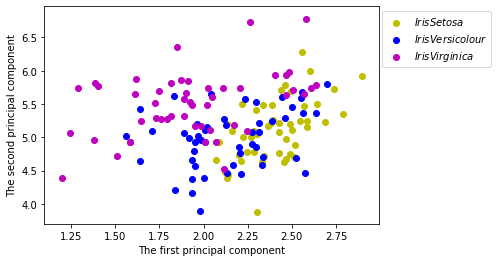

In [10]:
# The projection of the dataset on the first two principal components
plt.scatter(df_prj_g1[0], df_prj_g1[1], c='y', label="$Iris Setosa$")  
plt.scatter(df_prj_g2[0], df_prj_g2[1], c='blue', label='$Iris Versicolour$')
plt.scatter(df_prj_g3[0], df_prj_g3[1], c='m', label='$Iris Virginica$')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")

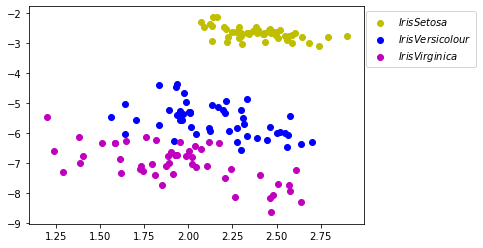

In [11]:
# The projection of the dataset on the first and third principal components
plt.scatter(df_prj_g1[0], df_prj_g1[2], c='y', label="$Iris Setosa$")  
plt.scatter(df_prj_g2[0], df_prj_g2[2], c='blue', label='$Iris Versicolour$')
plt.scatter(df_prj_g3[0], df_prj_g3[2], c='m', label='$Iris Virginica$')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')

 
## 2. Assess with at least two methods whether for each of the three populations, the dataset of size 50 (and dimension 4) comes from a sample of iid multivariate normal observations.


In [12]:
df = pd.DataFrame(df)
df['group'] = df.index//50 +1
df_g1 = df[df['group']==1]
df_g2 = df[df['group']==2]
df_g3 = df[df['group']==3]
df.columns = ['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width', 'group']
df

,Sepal length,Sepal width,Petal.Length,Petal.Width,group
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


### Method 1: Checking the univariate and marginal distributions of every dimention for every population by using histogram with scatter plot and Q-Q plot.

#### Result: Overall, all three population seem to come from a sample of iid multivariate normal observations except for the fourth component 'Petal.Width'.

#### (1)Univariate checking for population 1:
The histogram with scatter plot shows that it seems to be normal for population 1 on all components except for the fourth component 'Petal.Width'.\
Q-Q plots for component 'Sepal length' and 'Sepal width' are likely normal, however Q-Q plots for component 'Petal.Width' and 'Petal.Width' are not good enough to say they are normal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22815090>,
      dtype=object)

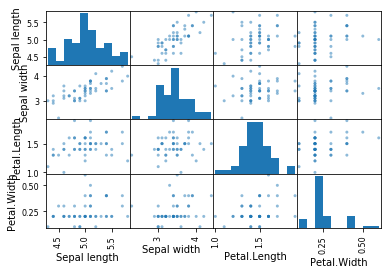

In [13]:
# Univariate checking for population 1
df_g1.columns = ['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width', 'group']
df_g1_dig = df_g1[['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width']]
df_g1_dig
pd.plotting.scatter_matrix(df_g1_dig)

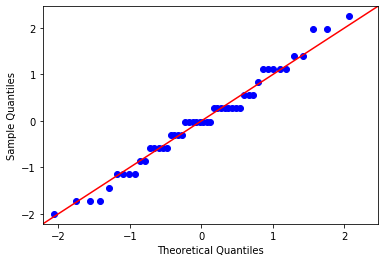

In [14]:
# Q-Q plot for "Sepal length" of population 1

## normalize the data
mu_g1_1 = (1/len(df_g1['Sepal length'])) * sum(df_g1['Sepal length'])
mu_g1_1
s_g1_1 = (1/(len(df_g1['Sepal length'])-1)) * sum([(x_i - mu_g1_1)**2 for x_i in df_g1['Sepal length']])
s_g1_1
normalized_g1_1 = [(x_i - mu_g1_1)/s_g1_1**(0.5) for x_i in df_g1['Sepal length']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g1_1), line='45')
plt.show()

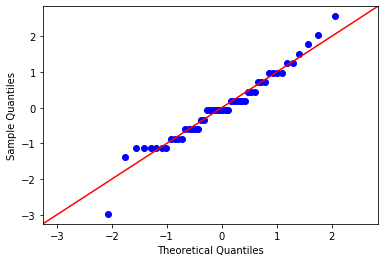

In [15]:
# Q-Q plot for "Sepal width" of population 1

## normalize the data
mu_g1_2 = (1/len(df_g1['Sepal width'])) * sum(df_g1['Sepal width'])
mu_g1_2
s_g1_2 = (1/(len(df_g1['Sepal width'])-1)) * sum([(x_i - mu_g1_2)**2 for x_i in df_g1['Sepal width']])
s_g1_2
normalized_g1_2 = [(x_i - mu_g1_2)/s_g1_2**(0.5) for x_i in df_g1['Sepal width']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g1_2), line='45')
plt.show()

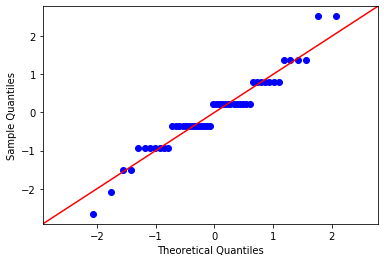

In [16]:
# Q-Q plot for "Petal.Length" of population 1

## normalize the data
mu_g1_3 = (1/len(df_g1['Petal.Length'])) * sum(df_g1['Petal.Length'])
mu_g1_3
s_g1_3 = (1/(len(df_g1['Petal.Length'])-1)) * sum([(x_i - mu_g1_3)**2 for x_i in df_g1['Petal.Length']])
s_g1_3
normalized_g1_3 = [(x_i - mu_g1_3)/s_g1_3**(0.5) for x_i in df_g1['Petal.Length']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g1_3), line='45')
plt.show()

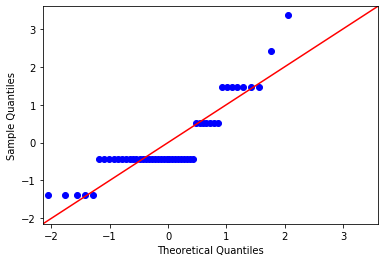

In [17]:
# Q-Q plot for "Petal.Width" of population 1

## normalize the data
mu_g1_4 = (1/len(df_g1['Petal.Width'])) * sum(df_g1['Petal.Width'])
mu_g1_4
s_g1_4 = (1/(len(df_g1['Petal.Width'])-1)) * sum([(x_i - mu_g1_4)**2 for x_i in df_g1['Petal.Width']])
s_g1_4
normalized_g1_4 = [(x_i - mu_g1_4)/s_g1_4**(0.5) for x_i in df_g1['Petal.Width']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g1_4), line='45')
plt.show()

#### (2)Univariate checking for population 2:
The histogram with scatter plot shows that it seems to be normal for population 2 on all components except for the third component 'Petal.Length' and fourth component 'Petal.Width'.\
Q-Q plots for the first three components are likely normal, however Q-Q plots for component 'Petal.Width' are not good enough to say they are normal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22ff8f50>,
      dtype=object)

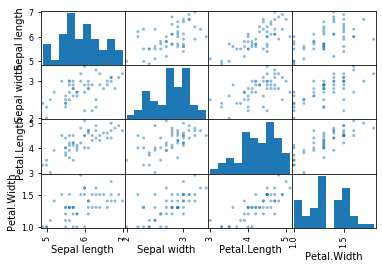

In [18]:
# Univariate checking for population 2
df_g2.columns = ['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width', 'group']
df_g2_dig = df_g2[['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width']]
df_g2_dig
pd.plotting.scatter_matrix(df_g2_dig)

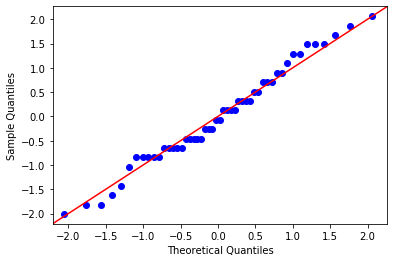

In [19]:
# Q-Q plot for "Sepal length" of population 2

## normalize the data
mu_g2_1 = (1/len(df_g2['Sepal length'])) * sum(df_g2['Sepal length'])
mu_g2_1
s_g2_1 = (1/(len(df_g2['Sepal length'])-1)) * sum([(x_i - mu_g2_1)**2 for x_i in df_g2['Sepal length']])
s_g2_1
normalized_g2_1 = [(x_i - mu_g2_1)/s_g2_1**(0.5) for x_i in df_g2['Sepal length']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g2_1), line='45')
plt.show()

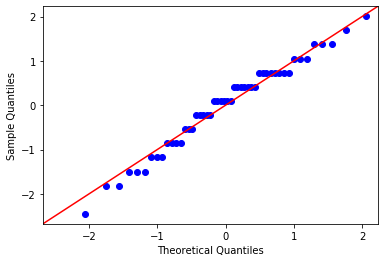

In [20]:
# Q-Q plot for "Sepal width" of population 2

## normalize the data
mu_g2_2 = (1/len(df_g2['Sepal width'])) * sum(df_g2['Sepal width'])
mu_g2_2
s_g2_2 = (1/(len(df_g2['Sepal width'])-1)) * sum([(x_i - mu_g2_2)**2 for x_i in df_g2['Sepal width']])
s_g2_2
normalized_g2_2 = [(x_i - mu_g2_2)/s_g2_2**(0.5) for x_i in df_g2['Sepal width']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g2_2), line='45')
plt.show()

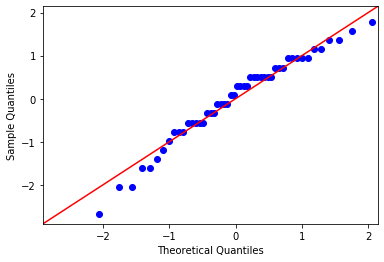

In [21]:
# Q-Q plot for "Petal.Length" of population 2

## normalize the data
mu_g2_3 = (1/len(df_g2['Petal.Length'])) * sum(df_g2['Petal.Length'])
mu_g2_3
s_g2_3 = (1/(len(df_g2['Petal.Length'])-1)) * sum([(x_i - mu_g2_3)**2 for x_i in df_g2['Petal.Length']])
s_g2_3
normalized_g2_3 = [(x_i - mu_g2_3)/s_g2_3**(0.5) for x_i in df_g2['Petal.Length']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g2_3), line='45')
plt.show()

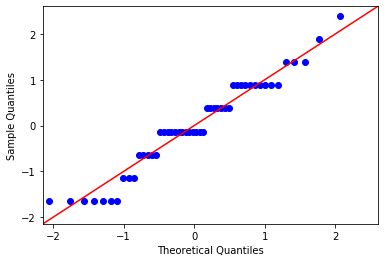

In [22]:
# Q-Q plot for "Petal.Width" of population 2

## normalize the data
mu_g2_4 = (1/len(df_g2['Petal.Width'])) * sum(df_g2['Petal.Width'])
mu_g2_4
s_g2_4 = (1/(len(df_g2['Petal.Width'])-1)) * sum([(x_i - mu_g2_4)**2 for x_i in df_g2['Petal.Width']])
s_g2_4
normalized_g2_4 = [(x_i - mu_g2_4)/s_g2_4**(0.5) for x_i in df_g2['Petal.Width']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g2_4), line='45')
plt.show()

#### (3)Univariate checking for population 3:
The histogram with scatter plot shows that it seems to be normal for population 3 on all components except for the fourth component 'Petal.Width'.\
Q-Q plots for the first three components are likely normal, however Q-Q plots for component 'Petal.Width' are not good enough to say they are normal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c230c6e10>,
      dtype=object)

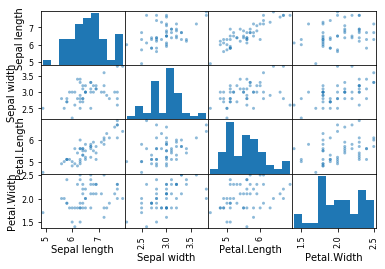

In [23]:
# Univariate checking for population 3
df_g3.columns = ['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width', 'group']
df_g3_dig = df_g3[['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width']]
df_g3_dig
pd.plotting.scatter_matrix(df_g3_dig)

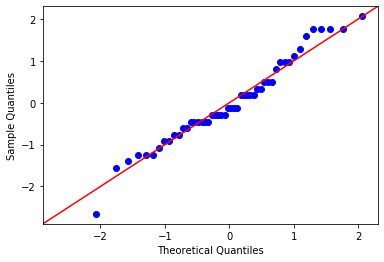

In [24]:
# Q-Q plot for "Sepal length" of population 3

## normalize the data
mu_g3_1 = (1/len(df_g3['Sepal length'])) * sum(df_g3['Sepal length'])
mu_g3_1
s_g3_1 = (1/(len(df_g3['Sepal length'])-1)) * sum([(x_i - mu_g3_1)**2 for x_i in df_g3['Sepal length']])
s_g3_1
normalized_g3_1 = [(x_i - mu_g3_1)/s_g3_1**(0.5) for x_i in df_g3['Sepal length']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g3_1), line='45')
plt.show()

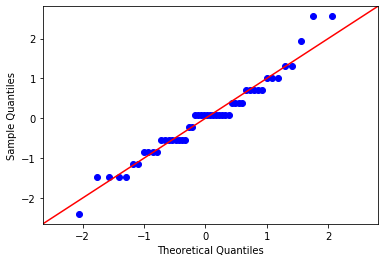

In [25]:
# Q-Q plot for "Sepal width" of population 3

## normalize the data
mu_g3_2 = (1/len(df_g3['Sepal width'])) * sum(df_g3['Sepal width'])
mu_g3_2
s_g3_2 = (1/(len(df_g3['Sepal width'])-1)) * sum([(x_i - mu_g3_2)**2 for x_i in df_g3['Sepal width']])
s_g3_2
normalized_g3_2 = [(x_i - mu_g3_2)/s_g3_2**(0.5) for x_i in df_g3['Sepal width']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g3_2), line='45')
plt.show()

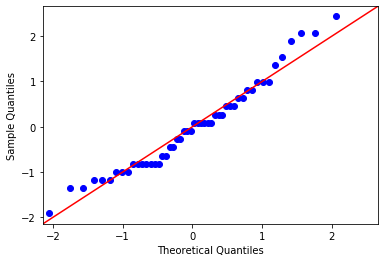

In [26]:
# Q-Q plot for "Petal.Length" of population 3

## normalize the data
mu_g3_3 = (1/len(df_g3['Petal.Length'])) * sum(df_g3['Petal.Length'])
mu_g3_3
s_g3_3 = (1/(len(df_g3['Petal.Length'])-1)) * sum([(x_i - mu_g3_3)**2 for x_i in df_g3['Petal.Length']])
s_g3_3
normalized_g3_3 = [(x_i - mu_g3_3)/s_g3_3**(0.5) for x_i in df_g3['Petal.Length']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g3_3), line='45')
plt.show()

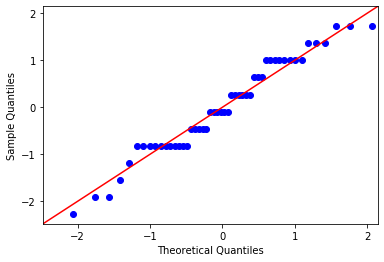

In [27]:
# Q-Q plot for "Petal.Width" of population 3

## normalize the data
mu_g3_4 = (1/len(df_g3['Petal.Width'])) * sum(df_g3['Petal.Width'])
mu_g3_4
s_g3_4 = (1/(len(df_g3['Petal.Width'])-1)) * sum([(x_i - mu_g3_4)**2 for x_i in df_g3['Petal.Width']])
s_g3_4
normalized_g3_4 = [(x_i - mu_g3_4)/s_g3_4**(0.5) for x_i in df_g3['Petal.Width']]

## Q-Q plot
fig = sm.qqplot(np.array(normalized_g3_4), line='45')
plt.show()

### Method 2: Checking the multivariate distributions for every population by using chi-square plot.

#### Result: all three population seem to come from a sample of iid multivariate normal observations. Because all three population's squared generalized distance ${d^2}_i=({\vec{x}}_i-\hat{\mu})s^{-1}({\vec{x}}_i-\hat{\mu})$ follow the ${\chi^2}_p$ with p=4 degrees of freedom.

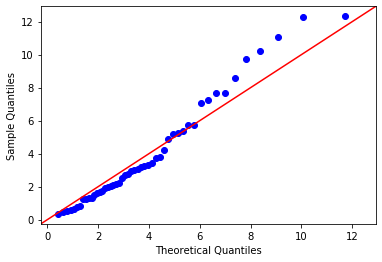

In [28]:
# Chi-square plot for population 1

n = 50
p = 4
mu_g1 = np.array(np.average(df_g1_dig, axis=0))
s_g1 = np.cov(df_g1_dig.T)
df_g1_dig = np.array(df_g1_dig)

copies_of_distance_g1 = []

for i in range(n):
    x_i = df_g1_dig[i,:]
    squared_generalized_distance_g1 = (x_i - mu_g1) @ np.linalg.inv(s_g1) @ (x_i - mu_g1).T
    copies_of_distance_g1.append(squared_generalized_distance_g1)

copies_of_distance_g1

fig = sm.qqplot(np.array(copies_of_distance_g1), line='45', dist=distributions.chi2, distargs=(p, ))

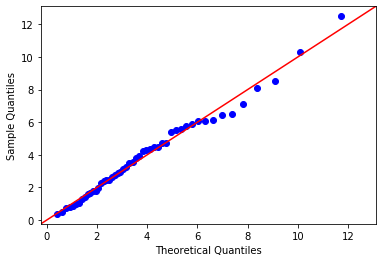

In [29]:
# Chi-square plot for population 2

n = 50
p = 4
mu_g2 = np.array(np.average(df_g2_dig, axis=0))
s_g2 = np.cov(df_g2_dig.T)
df_g2_dig = np.array(df_g2_dig)

copies_of_distance_g2 = []

for i in range(n):
    x_i = df_g2_dig[i,:]
    squared_generalized_distance_g2 = (x_i - mu_g2) @ np.linalg.inv(s_g2) @ (x_i - mu_g2).T
    copies_of_distance_g2.append(squared_generalized_distance_g2)

copies_of_distance_g2

fig = sm.qqplot(np.array(copies_of_distance_g2), line='45', dist=distributions.chi2, distargs=(p, ))

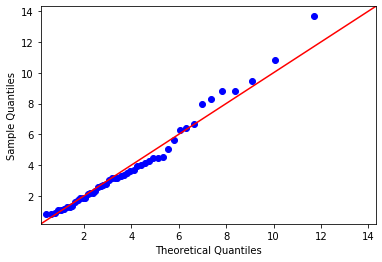

In [30]:
# Chi-square plot for population 3

n = 50
p = 4
mu_g3 = np.array(np.average(df_g3_dig, axis=0))
s_g3 = np.cov(df_g3_dig.T)
df_g3_dig = np.array(df_g3_dig)

copies_of_distance_g3 = []

for i in range(n):
    x_i = df_g3_dig[i,:]
    squared_generalized_distance_g3 = (x_i - mu_g3) @ np.linalg.inv(s_g3) @ (x_i - mu_g3).T
    copies_of_distance_g3.append(squared_generalized_distance_g3)

copies_of_distance_g3

fig = sm.qqplot(np.array(copies_of_distance_g3), line='45', dist=distributions.chi2, distargs=(p, ))

### Conclusion: In a word, after using two methods to check the normality of three populations, we can conclud that each of the three populations seem to come from a sample of iid multivariate normal obsevations.


## 3. Assuming normality, independence and that the covariance matrices are equal, perform a One-Way Multivariate ANOVA to test the null hypothesis that the multivariate means are equal in all 3 populations, against the alternative that at least one mean is different from the others. Do you reject the null hypothesis with confidence level 90%?

### Mothodology: we set H0: $\tau_1=\tau_2=\tau_3=0$   vs.   H1: at least one $\tau_i\neq0$    with $\alpha=0.1$ . We reject H0 if $(\frac{\sum_{n_l}-p-2}{p})(\frac{1-\sqrt{\Lambda^*}}{\sqrt{\Lambda^*}})>\ F_{2p,\ 2(\sum_{n_l}-p-2)}(\alpha)$ . Where $\Lambda^*=\frac{|W|}{|B+W|}$ (6-42) and MANOVA Table in Chapter 6 of the textbook.


In [31]:
n = 50
n_total = 150
p = 4
g = 3
alpha = 0.1

matrix_W = (n-1)* (s_g1 + s_g2 + s_g3)

matrix_B1 = n*np.outer((mu - mu_g1), (mu - mu_g1))
matrix_B2 = n*np.outer((mu - mu_g2), (mu - mu_g2))
matrix_B3 = n*np.outer((mu - mu_g3), (mu - mu_g3))
matrix_B = matrix_B1 + matrix_B2 + matrix_B3

# compute the wilks lambda using the formula (6-42) in the textbook
wilks_lambda = np.linalg.det(matrix_W) / np.linalg.det(matrix_B + matrix_W)
wilks_lambda

0.02343863065087846

In [32]:
# H0: tao1=tao2=tao3, H1: at least one tao is different from the others
# Because p=4, g=3, choosing the fourth test statistic in Table 6.3 of the textbook.

test_statistic = ((n_total-p-2)/p)*((1-np.sqrt(wilks_lambda))/np.sqrt(wilks_lambda))

quantiles_of_f_distribution = f.ppf(1-alpha, 2*p, 2*(n_total-p-2))

print('test_statistic is', test_statistic)
print('quantiles_of_f_distribution is', quantiles_of_f_distribution)

test_statistic is 199.14534354008362
quantiles_of_f_distribution is 1.6916332614240592


### Conclusion: Based on the reject condition described in the Chapter 6 of the textbook, because the test statistic is larger than $F_{8,\ 288}(0.9)$, we should reject the null hypothesis.


## 4. Do you reach the same conclusion when performing a univariate ANOVA  analysis with only the second column "Sepal width"?

### Mothodology: we set H0: $\tau_1=\tau_2=\tau_3=0$   vs.   H1: at least one $\tau_i\neq0$    with $\alpha=0.1$ . Based on the ANOVA Table for Computing Univarite Population Means in the Chapter 6 of the textbook, we reject H0 if $F=\frac{{\rm SS}_{tr}/(g-1)}{{\rm SS}_{res}/(\sum_{n_l}-g)}>\ F_{g-1,\ \sum_{n_l}-g}(\alpha)$ . 

In [33]:
# compute SS_residuals and SS_in_between
n = 50
n_total = 150
p = 4
g = 3
alpha = 0.1

SS_residuals = (n-1)*(s_g1[1,1] + s_g2[1,1] + s_g3[1,1])
SS_in_between = n*((mu[1] - mu_g1[1])**2 + (mu[1] - mu_g2[1])**2 + (mu[1] - mu_g3[1])**2)

print('SS_residuals', SS_residuals)
print('SS_in_between', SS_in_between)

SS_residuals 16.961999999999996
SS_in_between 11.344933333333353


In [34]:
degrees_of_freedom_SS_res = n_total - g
degrees_of_freedom_SS_in_between = g -1

SS_residuals/degrees_of_freedom_SS_res, SS_in_between/degrees_of_freedom_SS_in_between

(0.11538775510204079, 5.6724666666666765)

In [35]:
F = (SS_in_between/degrees_of_freedom_SS_in_between) / (SS_residuals/degrees_of_freedom_SS_res) 
F

49.160040089612174

In [36]:
quantiles_of_f_distribution1 = f.ppf(1-alpha, g-1, n_total-g)
quantiles_of_f_distribution1

2.339032030837414

### Conclusion: Based on the reject condition described in the Chapter 6 of the textbook(p.300), because ${F=49.16\ >F}_{2,\ 147}(0.9)$, we should reject the null hypothesis which is consistent with the result in question 3.

## 5. Propose a methodology to construct simultanneous 90% confidence intervals for all difference in treatment effects on all 4 components.
### Using the Result 6.5 in the textbook to construct simultanneous 90% confidence intervals: 
$\left[{\bar{x}}_{ki}-{\bar{x}}_{li}-t_{n-g}(\frac{\alpha}{pg(g-1)})\sqrt{\frac{w_{ii}}{n-g}(\frac{1}{n_k}+\frac{1}{n_l})},\ {\bar{x}}_{ki}-{\bar{x}}_{li}+t_{n-g}(\frac{\alpha}{pg(g-1)})\sqrt{\frac{w_{ii}}{n-g}(\frac{1}{n_k}+\frac{1}{n_l})}\right]$
### (1) 90% confidence intervals for the difference between population 1 and population 2: $\left(\tau_{1i}-\tau_{2i}\right)$ for i=1,2,3,4
 $\tau_{11}-\tau_{21}=\left(-1.21,-0.65\right)$\
 $\tau_{12}-\tau_{22}=\left(0.48,0.84\right)$\
 $\tau_{13}-\tau_{23}=\left(-3.03,-2.57\right)$\
 $\tau_{14}-\tau_{24}=\left(-1.19,-0.97\right)$

In [37]:
diff_g1 = mu_g1 - mu
diff_g2 = mu_g2 - mu
diff_g3 = mu_g3 - mu

# 90% confidence intervals for the difference between population 1 and population 2 on the first component 'Sepal length'
diff_g1_g2_1 = diff_g1[0] - diff_g2[0]
var_g1_g2_1 = (1/n + 1/n)*(matrix_W[0, 0]/(n_total-g))

CI_g1_g2_1_lower_bound = diff_g1_g2_1 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_1)
CI_g1_g2_1_upper_bound = diff_g1_g2_1 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_1)

print('confidence interval for the difference between population 1 \
and population 2 on the first component Sepal length is',\
      (CI_g1_g2_1_lower_bound, CI_g1_g2_1_upper_bound))


# 90% confidence intervals for the difference between population 1 and population 2 on the second component 'Sepal width'
diff_g1_g2_2 = diff_g1[1] - diff_g2[1]
var_g1_g2_2 = (1/n + 1/n)*(matrix_W[1, 1]/(n_total-g))

CI_g1_g2_2_lower_bound = diff_g1_g2_2 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_2)
CI_g1_g2_2_upper_bound = diff_g1_g2_2 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_2)

print('confidence interval for the difference between population 1 \
and population 2 on the second component Sepal width is',\
      (CI_g1_g2_2_lower_bound, CI_g1_g2_2_upper_bound))


# 90% confidence intervals for the difference between population 1 and population 2 on the third component 'Petal.Length'
diff_g1_g2_3 = diff_g1[2] - diff_g2[2]
var_g1_g2_3 = (1/n + 1/n)*(matrix_W[2, 2]/(n_total-g))

CI_g1_g2_3_lower_bound = diff_g1_g2_3 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_3)
CI_g1_g2_3_upper_bound = diff_g1_g2_3 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_3)

print('confidence interval for the difference between population 1 \
and population 2 on the third component Petal.Length is',\
      (CI_g1_g2_3_lower_bound, CI_g1_g2_3_upper_bound))


# 90% confidence intervals for the difference between population 1 and population 2 on the fourth component 'Petal.Width'
diff_g1_g2_4 = diff_g1[3] - diff_g2[3]
var_g1_g2_4 = (1/n + 1/n)*(matrix_W[3, 3]/(n_total-g))

CI_g1_g2_4_lower_bound = diff_g1_g2_4 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_4)
CI_g1_g2_4_upper_bound = diff_g1_g2_4 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g2_4)

print('confidence interval for the difference between population 1 \
and population 2 on the fourth component Petal.Width is',\
      (CI_g1_g2_4_lower_bound, CI_g1_g2_4_upper_bound))



confidence interval for the difference between population 1 and population 2 on the first component Sepal length is (-1.2053538897788243, -0.6546461102211769)
confidence interval for the difference between population 1 and population 2 on the second component Sepal width is (0.476305637735448, 0.8396943622645527)
confidence interval for the difference between population 1 and population 2 on the third component Petal.Length is (-3.0281800729738153, -2.567819927026184)
confidence interval for the difference between population 1 and population 2 on the fourth component Petal.Width is (-1.1894645236461114, -0.9705354763538888)


### (2) 90% confidence intervals for the difference between population 1 and population 3: $\left(\tau_{1i}-\tau_{3i}\right)$ for i=1,2,3,4
 $\tau_{11}-\tau_{31}=\left(-1.86,-1.31\right)$\
 $\tau_{12}-\tau_{32}=\left(0.27,0.64\right)$\
 $\tau_{13}-\tau_{33}=\left(-4.32,-3.86\right)$\
 $\tau_{14}-\tau_{34}=\left(-1.89,-1.67\right)$

In [38]:
# 90% confidence intervals for the difference between population 1 and population 3 on the first component 'Sepal length'
diff_g1_g3_1 = diff_g1[0] - diff_g3[0]
var_g1_g3_1 = (1/n + 1/n)*(matrix_W[0, 0]/(n_total-g))

CI_g1_g3_1_lower_bound = diff_g1_g3_1 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_1)
CI_g1_g3_1_upper_bound = diff_g1_g3_1 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_1)

print('confidence interval for the difference between population 1 \
and population 3 on the first component Sepal length is',\
      (CI_g1_g3_1_lower_bound, CI_g1_g3_1_upper_bound))


# 90% confidence intervals for the difference between population 1 and population 3 on the second component 'Sepal width'
diff_g1_g3_2 = diff_g1[1] - diff_g3[1]
var_g1_g3_2 = (1/n + 1/n)*(matrix_W[1, 1]/(n_total-g))

CI_g1_g3_2_lower_bound = diff_g1_g3_2 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_2)
CI_g1_g3_2_upper_bound = diff_g1_g3_2 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_2)

print('confidence interval for the difference between population 1 \
and population 3 on the second component Sepal width is',\
      (CI_g1_g3_2_lower_bound, CI_g1_g3_2_upper_bound))


# 90% confidence intervals for the difference between population 1 and population 3 on the third component 'Petal.Length'
diff_g1_g3_3 = diff_g1[2] - diff_g3[2]
var_g1_g3_3 = (1/n + 1/n)*(matrix_W[2, 2]/(n_total-g))

CI_g1_g3_3_lower_bound = diff_g1_g3_3 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_3)
CI_g1_g3_3_upper_bound = diff_g1_g3_3 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_3)

print('confidence interval for the difference between population 1 \
and population 3 on the third component Petal.Length is',\
      (CI_g1_g3_3_lower_bound, CI_g1_g3_3_upper_bound))


# 90% confidence intervals for the difference between population 1 and population 3 on the fourth component 'Petal.Width'
diff_g1_g3_4 = diff_g1[3] - diff_g3[3]
var_g1_g3_4 = (1/n + 1/n)*(matrix_W[3, 3]/(n_total-g))

CI_g1_g3_4_lower_bound = diff_g1_g3_4 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_4)
CI_g1_g3_4_upper_bound = diff_g1_g3_4 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g1_g3_4)

print('confidence interval for the difference between population 1 \
and population 3 on the fourth component Petal.Width is',\
      (CI_g1_g3_4_lower_bound, CI_g1_g3_4_upper_bound))



confidence interval for the difference between population 1 and population 3 on the first component Sepal length is (-1.8573538897788227, -1.3066461102211753)
confidence interval for the difference between population 1 and population 3 on the second component Sepal width is (0.2723056377354487, 0.6356943622645534)
confidence interval for the difference between population 1 and population 3 on the third component Petal.Length is (-4.320180072973815, -3.859819927026184)
confidence interval for the difference between population 1 and population 3 on the fourth component Petal.Width is (-1.8894645236461112, -1.6705354763538884)


### (3) 90% confidence intervals for the difference between population 2 and population 3: $\left(\tau_{2i}-\tau_{3i}\right)$ for i=1,2,3,4
 $\tau_{21}-\tau_{31}=\left(-0.93,-0.38\right)$\
 $\tau_{22}-\tau_{32}=\left(-0.39,-0.02\right)$\
 $\tau_{23}-\tau_{33}=\left(-1.52,-1.06\right)$\
 $\tau_{24}-\tau_{34}=\left(-0.81,-0.59\right)$

In [39]:
# 90% confidence intervals for the difference between population 2 and population 3 on the first component 'Sepal length'
diff_g2_g3_1 = diff_g2[0] - diff_g3[0]
var_g2_g3_1 = (1/n + 1/n)*(matrix_W[0, 0]/(n_total-g))

CI_g2_g3_1_lower_bound = diff_g2_g3_1 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_1)
CI_g2_g3_1_upper_bound = diff_g2_g3_1 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_1)

print('confidence interval for the difference between population 2 \
and population 3 on the first component Sepal length is',\
      (CI_g2_g3_1_lower_bound, CI_g2_g3_1_upper_bound))


# 90% confidence intervals for the difference between population 2 and population 3 on the second component 'Sepal width'
diff_g2_g3_2 = diff_g2[1] - diff_g3[1]
var_g2_g3_2 = (1/n + 1/n)*(matrix_W[1, 1]/(n_total-g))

CI_g2_g3_2_lower_bound = diff_g2_g3_2 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_2)
CI_g2_g3_2_upper_bound = diff_g2_g3_2 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_2)

print('confidence interval for the difference between population 2 \
and population 3 on the second component Sepal width is',\
      (CI_g2_g3_2_lower_bound, CI_g2_g3_2_upper_bound))


# 90% confidence intervals for the difference between population 2 and population 3 on the third component 'Petal.Length'
diff_g2_g3_3 = diff_g2[2] - diff_g3[2]
var_g2_g3_3 = (1/n + 1/n)*(matrix_W[2, 2]/(n_total-g))

CI_g2_g3_3_lower_bound = diff_g2_g3_3 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_3)
CI_g2_g3_3_upper_bound = diff_g2_g3_3 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_3)

print('confidence interval for the difference between population 2 \
and population 3 on the third component Petal.Length is',\
      (CI_g2_g3_3_lower_bound, CI_g2_g3_3_upper_bound))


# 90% confidence intervals for the difference between population 2 and population 3 on the fourth component 'Petal.Width'
diff_g2_g3_4 = diff_g2[3] - diff_g3[3]
var_g2_g3_4 = (1/n + 1/n)*(matrix_W[3, 3]/(n_total-g))

CI_g2_g3_4_lower_bound = diff_g2_g3_4 - t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_4)
CI_g2_g3_4_upper_bound = diff_g2_g3_4 + t.ppf(1-alpha/(p*g*(g-1)), n_total-g)*np.sqrt(var_g2_g3_4)

print('confidence interval for the difference between population 2 \
and population 3 on the fourth component Petal.Width is',\
      (CI_g2_g3_4_lower_bound, CI_g2_g3_4_upper_bound))



confidence interval for the difference between population 2 and population 3 on the first component Sepal length is (-0.927353889778822, -0.37664611022117467)
confidence interval for the difference between population 2 and population 3 on the second component Sepal width is (-0.38569436226455167, -0.022305637735446943)
confidence interval for the difference between population 2 and population 3 on the third component Petal.Length is (-1.5221800729738155, -1.061819927026184)
confidence interval for the difference between population 2 and population 3 on the fourth component Petal.Width is (-0.8094645236461112, -0.5905354763538887)


## 6. By generating independently 1000 times a dataset with similar size, number of populations and number of dimension as the above dataset, verify that, under H0, the methodology you used in question 3 rejects H0 approximately 100 times out of 1000. (If possible on your laptop, run 10000 simulations instead of 1000; you will not be penalized if only 1000 simulations were run).
### (1) Generating the dataset

In [40]:
p = 4

Sigma = 1.5*np.eye(p) + 0.2*np.ones_like(np.eye(p))

overall_mean = mu

populations = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]
g = len(populations)


population_sizes = {
    "Iris Setosa": 50,   # n0 = 50
    "Iris Versicolour": 50,  # n1 = 50
    "Iris Virginica": 50,   # n2 = 50
}
treatment_effects_H1 = {
    "Iris Setosa": mu_g1,
    "Iris Versicolour": mu_g2,
    "Iris Virginica": mu_g3,
}
treatment_effects_H0 = {
    "Iris Setosa": np.array([0.0, 0.0, 0.0, 0.0,]),
    "Iris Versicolour": np.array([0.0, 0.0, 0.0, 0.0,]),
    "Iris Virginica": np.array([0.0, 0.0, 0.0, 0.0,]),
}

def generate_dataset(treatment_effects):
    observations = {}
    for l in populations:
        observations[l] = np.random.multivariate_normal(overall_mean + treatment_effects[l],\
                                       Sigma,
                                       size=population_sizes[l])
    return observations

In [41]:
# Example

observations = generate_dataset(treatment_effects_H0)

for l in populations:
    print("Population:", l, " - size:", population_sizes[l])
    print(observations[l])
    print()

Population: Iris Setosa  - size: 50
[[ 5.81631556e+00  3.47950350e+00  3.66172245e+00  1.78779657e+00]
 [ 7.98299809e+00  3.94540800e+00  5.23265520e+00  1.32355319e+00]
 [ 4.29205973e+00  9.80981803e-01  5.78924036e+00  1.00071715e+00]
 [ 6.37649500e+00  4.06986363e+00  4.42284501e+00  1.74921078e+00]
 [ 8.75327458e+00  3.62276235e+00  5.89980286e+00  4.73334640e-01]
 [ 6.46295868e+00  2.26467674e+00  3.29883717e+00  1.59551774e+00]
 [ 5.90431410e+00  3.68844247e+00  5.52110688e+00  2.60697623e+00]
 [ 5.23582084e+00  3.61222581e+00  2.67140741e+00  1.63833277e+00]
 [ 6.76934289e+00  3.37109022e+00  2.04090713e+00 -1.92465703e-01]
 [ 6.03825147e+00  5.05102448e+00  3.99039333e+00  1.53733303e+00]
 [ 5.64174441e+00  2.99339180e+00  3.61270095e+00 -8.63184679e-01]
 [ 4.39633955e+00  1.30456203e+00  1.81790445e+00  2.71176614e-01]
 [ 6.68167393e+00  4.77433101e+00  7.16268612e+00  2.19502915e+00]
 [ 5.53158730e+00  1.24699644e+00  4.10283617e+00  3.74111145e-01]
 [ 4.36281767e+00  1.06835

In [42]:
total_sample_size = sum(population_sizes.values())
total_sample_size

150

In [43]:
overall_empirical_mean = sum([sum(observations[l]) for l in populations])/total_sample_size
overall_empirical_mean # this is our x_bar

array([5.87067729, 3.17533486, 3.73655925, 1.35094268])

In [44]:
empirical_means_within_populations = {}
for l in populations:
    empirical_means_within_populations[l] = sum(observations[l])/population_sizes[l]
empirical_means_within_populations

{'Iris Setosa': array([5.76005005, 3.28161536, 3.62791623, 1.42532999]),
 'Iris Versicolour': array([5.81708896, 2.99637311, 3.85508735, 1.27116622]),
 'Iris Virginica': array([6.03489286, 3.2480161 , 3.72667417, 1.35633184])}

In [45]:
matrix_W0 = sum([ np.outer(observations[l][i,]-empirical_means_within_populations[l],
                          observations[l][i,]-empirical_means_within_populations[l])
                     for l in populations
                     for i in range(population_sizes[l])
                   ])
matrix_W0

array([[265.53863785,  62.63941541,  30.38021701, -15.04924355],
       [ 62.63941541, 316.74450227,  75.27063185,  67.88815875],
       [ 30.38021701,  75.27063185, 280.59678822,  53.8163238 ],
       [-15.04924355,  67.88815875,  53.8163238 , 278.97669179]])

In [46]:
matrix_B0 = sum([ population_sizes[l] * \
                 np.outer(overall_empirical_mean-empirical_means_within_populations[l],
                          overall_empirical_mean-empirical_means_within_populations[l])
                     for l in populations
                   ])
matrix_B0

array([[ 2.10384243,  0.48840672,  0.20219351, -0.15345962],
       [ 0.48840672,  2.43027079, -1.67385453,  1.12872731],
       [ 0.20219351, -1.67385453,  1.29749654, -0.87953433],
       [-0.15345962,  1.12872731, -0.87953433,  0.59633993]])

### (2) Simulation 10000 times

In [47]:
number_of_simulations = 10000


do_i_reject_H0 = []
do_i_fail_to_reject_H0 = []
    
for s in range(number_of_simulations):
  
    observations = generate_dataset(treatment_effects_H0)
    hypothesis = 'H0'
    
    overall_empirical_mean = sum([sum(observations[l]) for l in populations])/total_sample_size
    empirical_means_within_populations = {}
    for l in populations:
        empirical_means_within_populations[l] = sum(observations[l])/population_sizes[l]
    # residuals
    matrix_W0 = sum([ np.outer(observations[l][i,]-empirical_means_within_populations[l],
                          observations[l][i,]-empirical_means_within_populations[l])
                     for l in populations
                     for i in range(population_sizes[l])
                   ])
    # treatment matrix
    matrix_B0 = sum([ population_sizes[l] * \
                 np.outer(overall_empirical_mean-empirical_means_within_populations[l],
                          overall_empirical_mean-empirical_means_within_populations[l])
                     for l in populations
                   ])
    wilks_lambda0 = np.linalg.det(matrix_W0) / np.linalg.det(matrix_B0 + matrix_W0)
    
    test_statistic = ((total_sample_size-p-2)/p)*((1-np.sqrt(wilks_lambda0))/np.sqrt(wilks_lambda0))
    quantiles_of_f_distribution = f.ppf(1-0.1, 2*p, 2*(total_sample_size-p-2))
    
    do_i_reject_H0.append(
      test_statistic > quantiles_of_f_distribution
    )
    
    do_i_fail_to_reject_H0.append(
      test_statistic < quantiles_of_f_distribution
    )
    

In [48]:
sum(do_i_reject_H0)

994

In [49]:
sum(do_i_fail_to_reject_H0)

9006

### Conclusion: There are approximately 1000 times (994times) out of 10000 that we reject H0 under H0. Therefore, we could vrify the methodology used in question 3.